# ADA (XUAN) ZHONG - HM 1.1

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('vitoria2006.csv')

In [83]:
# 1.a

In [84]:
df[(df.totalprice > 400000) & (df.garage == 1)][['totalprice','garage']]

,totalprice,garage
1,409000.0,1
12,560000.0,1
33,403000.0,1
47,426200.0,1
132,457000.0,1
185,433500.0,1


In [85]:
df[(df.totalprice > 400000) & (df.garage == 1)][['totalprice','garage']].count()

totalprice    6
garage        6
dtype: int64

In [86]:
# 1.b

In [87]:
from scipy.stats import norm

In [104]:
mu,sigma = norm.fit(df['totalprice'])

In [105]:
rf = stats.relfreq(df['totalprice'], numbins = 30)

In [106]:
x_wid = rf.binsize

In [107]:
x = rf.lowerlimit + np.linspace(0, x_wid*30, 30)

In [108]:
y = stats.norm.pdf(x, mu, sigma)

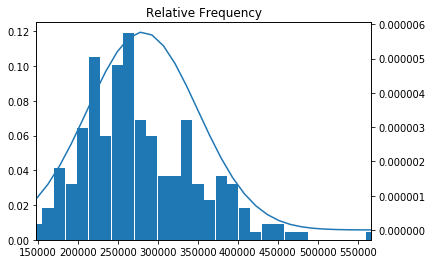

In [153]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, rf.frequency, width = x_wid)
ax.set_title('Relative Frequency')
ax.set_xlim([x.min(), x.max()])
ax2 = ax.twinx()
ax2.plot(x, y)
plt.show()

In [151]:
prob = 1 - norm.cdf((300000 - mu)/sigma)
print(prob)

0.390296680500422


In [17]:
# 1.c

In [18]:
dfnum = df._get_numeric_data()

In [19]:
covs = dfnum.cov()
covs

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,4.802276e+09,1.162639e+06,-275569.809042,4306.929479,23103.901095,23829.329737,16364.512574,14244.123620,7536.746579
area,1.162639e+06,4.298508e+02,-15.815009,3.600908,8.392216,6.484930,3.286218,3.291590,1.274237
age,-2.755698e+05,-1.581501e+01,213.031243,-2.522175,-0.766034,-2.049338,-1.408532,-2.402951,-1.581744
floor,4.306929e+03,3.600908e+00,-2.522175,4.524077,0.175538,0.110980,-0.029214,0.172240,-0.103708
rooms,2.310390e+04,8.392216e+00,-0.766034,0.175538,0.402317,0.133514,0.058893,0.090052,0.008456
toilets,2.382933e+04,6.484930e+00,-2.049338,0.110980,0.133514,0.250116,0.102313,0.090263,0.044476
garage,1.636451e+04,3.286218e+00,-1.408532,-0.029214,0.058893,0.102313,0.203293,0.049296,0.028622
elevator,1.424412e+04,3.291590e+00,-2.402951,0.172240,0.090052,0.090263,0.049296,0.161840,0.034668
storage,7.536747e+03,1.274237e+00,-1.581744,-0.103708,0.008456,0.044476,0.028622,0.034668,0.165476


In [20]:
corrs = dfnum.corr()
corrs

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,1.000000,0.809213,-0.272450,0.029220,0.525627,0.687571,0.523742,0.510939,0.267358
area,0.809213,1.000000,-0.052262,0.081656,0.638166,0.625425,0.351541,0.394643,0.151086
age,-0.272450,-0.052262,1.000000,-0.081243,-0.082745,-0.280751,-0.214034,-0.409242,-0.266408
floor,0.029220,0.081656,-0.081243,1.000000,0.130113,0.104329,-0.030462,0.201292,-0.119861
rooms,0.525627,0.638166,-0.082745,0.130113,1.000000,0.420892,0.205930,0.352912,0.032771
toilets,0.687571,0.625425,-0.280751,0.104329,0.420892,1.000000,0.453729,0.448640,0.218621
garage,0.523742,0.351541,-0.214034,-0.030462,0.205930,0.453729,1.000000,0.271774,0.156053
elevator,0.510939,0.394643,-0.409242,0.201292,0.352912,0.448640,0.271774,1.000000,0.211845
storage,0.267358,0.151086,-0.266408,-0.119861,0.032771,0.218621,0.156053,0.211845,1.000000


In [154]:
# 1.d

Text(0, 0.5, 'Area')

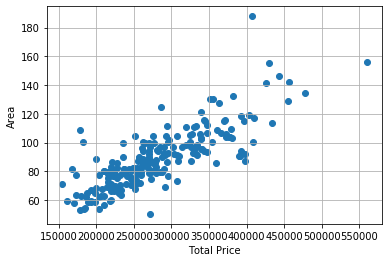

In [155]:
plt.scatter(df['totalprice'],df['area'])
plt.grid()
plt.xlabel('Total Price')
plt.ylabel('Area')

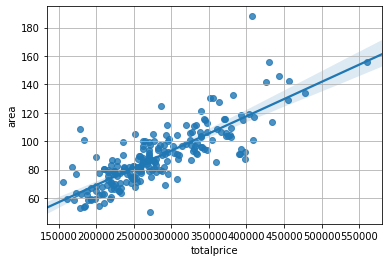

In [158]:
sns.regplot('totalprice','area',df)
plt.grid()

In [163]:
df[(df['area'] > 180)]

,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,storage
30,407000.0,187.910004,Z31,4A,38,3,6,E50,2B,1,0,1,S5,4A,1


In [164]:
# 1.e

In [185]:
df2 = df['category'].str.replace('A','').str.replace('B','')

In [186]:
df.groupby(df2)['totalprice'].agg('median')

category
2    345500.0
3    279000.0
4    224000.0
5    183000.0
Name: totalprice, dtype: float64